# Importações

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder, OrdinalEncoder, StandardScaler


# Algumas perguntas a serem feitas:

-`1. Existe diferença na ocorrência de ataques cardíacos entre homens e mulheres? Além disso, existe diferença na faixa etária?`

-`2. Existe uma relação entre o índice de massa corporal (IMC) e a chance de um ataque cardíaco?`

-`3. Quais são as características demográficas mais comuns entre os pacientes que tiveram um ataque cardíaco (idade, sexo, região, etc.)?`

-`4. Quem faz atividade física tem menos casos de ataque cardíaco?`

-`5. Qual é o impacto do histórico familiar na ocorrência de ataques cardíacos?`

-`6. Qual é a distribuição de níveis de colesterol entre os pacientes com e sem ataques cardíacos?`

-`7. Quais variáveis (idade, pressão arterial, colesterol, etc.) têm maior correlação com a ocorrência de ataques cardíacos?`

-`8. Consigo construir um modelo para prever se o paciente terá ou não ataque do coração?`


In [3]:
# Abrindo os dados
df = pd.read_csv("dataset/Heart_Attack_Data_Set.csv")
# Escolhendo essa paleta de cores
sns.set_palette("muted")

# Como estão meus dados ? 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Atributos: 
3 age: age in years
4 sex: sex (1 = male; 0 = female)
9 cp: chest pain type
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic
10 trestbps: resting blood pressure (in mm Hg on admission to the
hospital)
12 chol: serum cholestoral in mg/d
16 fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
19 restecg: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST
32 thalach: maximum heart rate achieved
38 exang: exercise induced angina (1 = yes; 0 = no)
41 slope: the slope of the peak exercise ST segment
-- Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping

18 famhist: family history of coronary artery disease (1 = yes; 0 = no)

elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy
by Estes' criteria
20 ekgmo (month of exercise ECG reading)
21 ekgday(day of exercise ECG reading)
22 ekgyr (year of exercise ECG reading)
23 dig (digitalis used furing exercise ECG: 1 = yes; 0 = no)
24 prop (Beta blocker used during exercise ECG: 1 = yes; 0 = no)
25 nitr (nitrates used during exercise ECG: 1 = yes; 0 = no)
26 pro (calcium channel blocker used during exercise ECG: 1 = yes; 0 = no)
27 diuretic (diuretic used used during exercise ECG: 1 = yes; 0 = no)
28 proto: exercise protocol
1 = Bruce
2 = Kottus
3 = McHenry
4 = fast Balke
5 = Balke
6 = Noughton
7 = bike 150 kpa min/min (Not sure if "kpa min/min" is what was
written!)
8 = bike 125 kpa min/min
9 = bike 100 kpa min/min
10 = bike 75 kpa min/min
11 = bike 50 kpa min/min
12 = arm ergometer
29 thaldur: duration of exercise test in minutes
30 thaltime: time when ST measure depression was noted
31 met: mets achieved

33 thalrest: resting heart rate
34 tpeakbps: peak exercise blood pressure (first of 2 parts)
35 tpeakbpd: peak exercise blood pressure (second of 2 parts)
36 dummy
37 trestbpd: resting blood pressure

39 xhypo: (1 = yes; 0 = no)
40 oldpeak = ST depression induced by exercise relative to rest

42 rldv5: height at rest
43 rldv5e: height at peak exercise
44 ca: number of major vessels (0-3) colored by flourosopy
45 restckm: irrelevant
46 exerckm: irrelevant
47 restef: rest raidonuclid (sp?) ejection fraction
48 restwm: rest wall (sp?) motion abnormality
0 = none
1 = mild or moderate
2 = moderate or severe
3 = akinesis or dyskmem (sp?)
49 exeref: exercise radinalid (sp?) ejection fraction
50 exerwm: exercise wall (sp?) motion
51 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
52 thalsev: not used
53 thalpul: not used
54 earlobe: not used
55 cmo: month of cardiac cath (sp?) (perhaps "call")
56 cday: day of cardiac cath (sp?)
57 cyr: year of cardiac cath (sp?)
58 num: diagnosis of heart disease (angiographic disease status)
-- Value 0: < 50% diameter narrowing -- Value 1: > 50% diameter narrowing
(in any major vessel: attributes 59 through 68 are vessels)
59 lmt
60 ladprox
61 laddist
62 diag
63 cxmain
64 ramus
65 om1
66 om2
67 rcaprox
68 rcadist
69 lvx1: not used
70 lvx2: not used
71 lvx3: not used
72 lvx4: not used
73 lvf: not used
74 cathef: not used
75 junk: not used
76 name: last name of patient

In [ ]:
##

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.columns

Index(['ID', 'Age', 'Gender', 'Region', 'Blood_Pressure', 'Cholesterol', 'BMI',
       'Heart_Rate', 'Exercise_Level', 'Smoking', 'Alcohol_Consumption',
       'Diabetes', 'Family_History', 'Stress_Level', 'Heart_Attack', 'Angina',
       'Heart_Disease_History', 'Diet', 'Sleep_Hours', 'Occupation',
       'Income_Level', 'Physical_Activity', 'Education_Level',
       'Marital_Status', 'Urban_Rural', 'Medication', 'Health_Awareness',
       'Daily_Water_Intake', 'Mental_Health', 'Obesity'],
      dtype='object')

In [9]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [43]:
df[['Urban_Rural','Region']]

,Urban_Rural,Region
0,Rural,Rural
1,Urban,Urban
2,Urban,Rural
3,Urban,Rural
4,Urban,Urban
...,...,...
49995,Urban,Rural
49996,Urban,Rural
49997,Urban,Suburban
49998,Urban,Rural


In [54]:
df.isnull().sum()

ID                           0
Age                          0
Gender                       0
Region                       0
Blood_Pressure               0
Cholesterol                  0
BMI                          0
Heart_Rate                   0
Exercise_Level               0
Smoking                      0
Alcohol_Consumption      25024
Diabetes                     0
Family_History               0
Stress_Level                 0
Heart_Attack                 0
Angina                       0
Heart_Disease_History        0
Diet                         0
Sleep_Hours                  0
Occupation                   0
Income_Level                 0
Physical_Activity            0
Education_Level              0
Marital_Status               0
Urban_Rural                  0
Medication                   0
Health_Awareness             0
Daily_Water_Intake           0
Mental_Health                0
Obesity                      0
dtype: int64

In [57]:
df[df.duplicated()]

,ID,Age,Gender,Region,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Exercise_Level,Smoking,...,Income_Level,Physical_Activity,Education_Level,Marital_Status,Urban_Rural,Medication,Health_Awareness,Daily_Water_Intake,Mental_Health,Obesity


In [16]:
# Removendo a coluna ID que não ajudará na nossa análise
df.drop(['ID'],axis = 1,inplace=True)

In [5]:
# Separando as colunas e cada tipo
categorical_features = df.select_dtypes(['object','bool']).columns.tolist()
numerical_features = df.select_dtypes('number').columns.tolist()

print(f"Essas são as variáveis categoricas tamanho {len(categorical_features)}:\n {categorical_features}")
print(f"Essas são as variáveis numéricas {len(numerical_features)}:\n {numerical_features}")

Essas são as variáveis categoricas tamanho 19:
 ['Gender', 'Region', 'Exercise_Level', 'Smoking', 'Alcohol_Consumption', 'Diabetes', 'Family_History', 'Heart_Attack', 'Angina', 'Heart_Disease_History', 'Diet', 'Occupation', 'Income_Level', 'Physical_Activity', 'Education_Level', 'Marital_Status', 'Urban_Rural', 'Medication', 'Obesity']
Essas são as variáveis numéricas 10:
 ['Age', 'Blood_Pressure', 'Cholesterol', 'BMI', 'Heart_Rate', 'Stress_Level', 'Sleep_Hours', 'Health_Awareness', 'Daily_Water_Intake', 'Mental_Health']


In [6]:
for categorical in categorical_features:
    print('-'*20)
    print(df[categorical].value_counts(normalize=True))

--------------------
Gender
Female    0.48310
Male      0.47888
Other     0.03802
Name: proportion, dtype: float64
--------------------
Region
Urban       0.50068
Rural       0.29892
Suburban    0.20040
Name: proportion, dtype: float64
--------------------
Exercise_Level
Moderate    0.49892
Low         0.30200
High        0.19908
Name: proportion, dtype: float64
--------------------
Smoking
False    0.70016
True     0.29984
Name: proportion, dtype: float64
--------------------
Alcohol_Consumption
Moderate    0.80165
Heavy       0.19835
Name: proportion, dtype: float64
--------------------
Diabetes
False    0.84976
True     0.15024
Name: proportion, dtype: float64
--------------------
Family_History
False    0.5988
True     0.4012
Name: proportion, dtype: float64
--------------------
Heart_Attack
False    0.88238
True     0.11762
Name: proportion, dtype: float64
--------------------
Angina
False    0.90068
True     0.09932
Name: proportion, dtype: float64
--------------------
Heart_Dise

C:\Users\Fiuza\AppData\Local\Temp\ipykernel_3688\3590419210.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Heart_Attack',y='count',data=df_heart_atck,palette='muted',legend=False)
C:\Users\Fiuza\AppData\Local\Temp\ipykernel_3688\3590419210.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().set_visible(False)


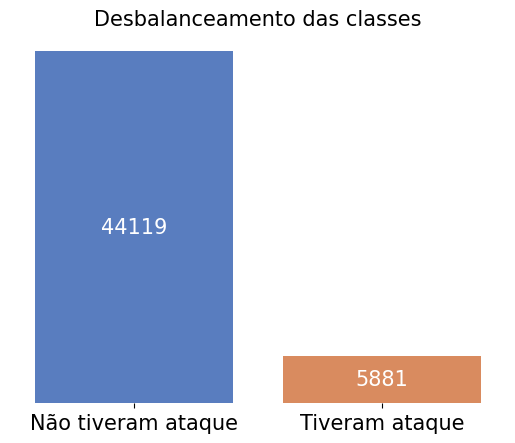

In [62]:
df_heart_atck = df['Heart_Attack'].value_counts()
df_heart_atck = df_heart_atck.reset_index()

ax = sns.barplot(x='Heart_Attack',y='count',data=df_heart_atck,palette='muted',legend=False)
ax.set_xlabel('')
ax.yaxis.set_visible(False)
ax.set_title('Desbalanceamento das classes',fontsize=15)
ax.set_xticks(range(2),['Não tiveram ataque','Tiveram ataque'])
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.legend().set_visible(False)

for bar in ax.patches:
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2  # Centralizar o rótulo na barra
    y = bar.get_y() + height / 2  # Centralizar o rótulo verticalmente
    ax.text(x, y, f'{height:.0f}', ha='center', va='center', fontsize=15, color='white')
    

In [71]:
sns.palettes.SEABORN_PALETTES

{'deep': ['#4C72B0',
  '#DD8452',
  '#55A868',
  '#C44E52',
  '#8172B3',
  '#937860',
  '#DA8BC3',
  '#8C8C8C',
  '#CCB974',
  '#64B5CD'],
 'deep6': ['#4C72B0', '#55A868', '#C44E52', '#8172B3', '#CCB974', '#64B5CD'],
 'muted': ['#4878D0',
  '#EE854A',
  '#6ACC64',
  '#D65F5F',
  '#956CB4',
  '#8C613C',
  '#DC7EC0',
  '#797979',
  '#D5BB67',
  '#82C6E2'],
 'muted6': ['#4878D0', '#6ACC64', '#D65F5F', '#956CB4', '#D5BB67', '#82C6E2'],
 'pastel': ['#A1C9F4',
  '#FFB482',
  '#8DE5A1',
  '#FF9F9B',
  '#D0BBFF',
  '#DEBB9B',
  '#FAB0E4',
  '#CFCFCF',
  '#FFFEA3',
  '#B9F2F0'],
 'pastel6': ['#A1C9F4', '#8DE5A1', '#FF9F9B', '#D0BBFF', '#FFFEA3', '#B9F2F0'],
 'bright': ['#023EFF',
  '#FF7C00',
  '#1AC938',
  '#E8000B',
  '#8B2BE2',
  '#9F4800',
  '#F14CC1',
  '#A3A3A3',
  '#FFC400',
  '#00D7FF'],
 'bright6': ['#023EFF', '#1AC938', '#E8000B', '#8B2BE2', '#FFC400', '#00D7FF'],
 'dark': ['#001C7F',
  '#B1400D',
  '#12711C',
  '#8C0800',
  '#591E71',
  '#592F0D',
  '#A23582',
  '#3C3C3C',
  '#B8850A

In [65]:
sns.color_palette("muted")

[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803),
 (0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.5843137254901961, 0.4235294117647059, 0.7058823529411765),
 (0.5490196078431373, 0.3803921568627451, 0.23529411764705882),
 (0.8627450980392157, 0.49411764705882355, 0.7529411764705882),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.8352941176470589, 0.7333333333333333, 0.403921568627451),
 (0.5098039215686274, 0.7764705882352941, 0.8862745098039215)]

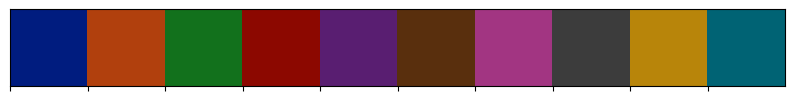

In [75]:
sns.palplot(sns.color_palette("dark"))

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Blood_Pressure'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'Heart_Rate'}>,
        <Axes: title={'center': 'Stress_Level'}>],
       [<Axes: title={'center': 'Sleep_Hours'}>,
        <Axes: title={'center': 'Health_Awareness'}>,
        <Axes: title={'center': 'Daily_Water_Intake'}>],
       [<Axes: title={'center': 'Mental_Health'}>, <Axes: >, <Axes: >]],
      dtype=object)

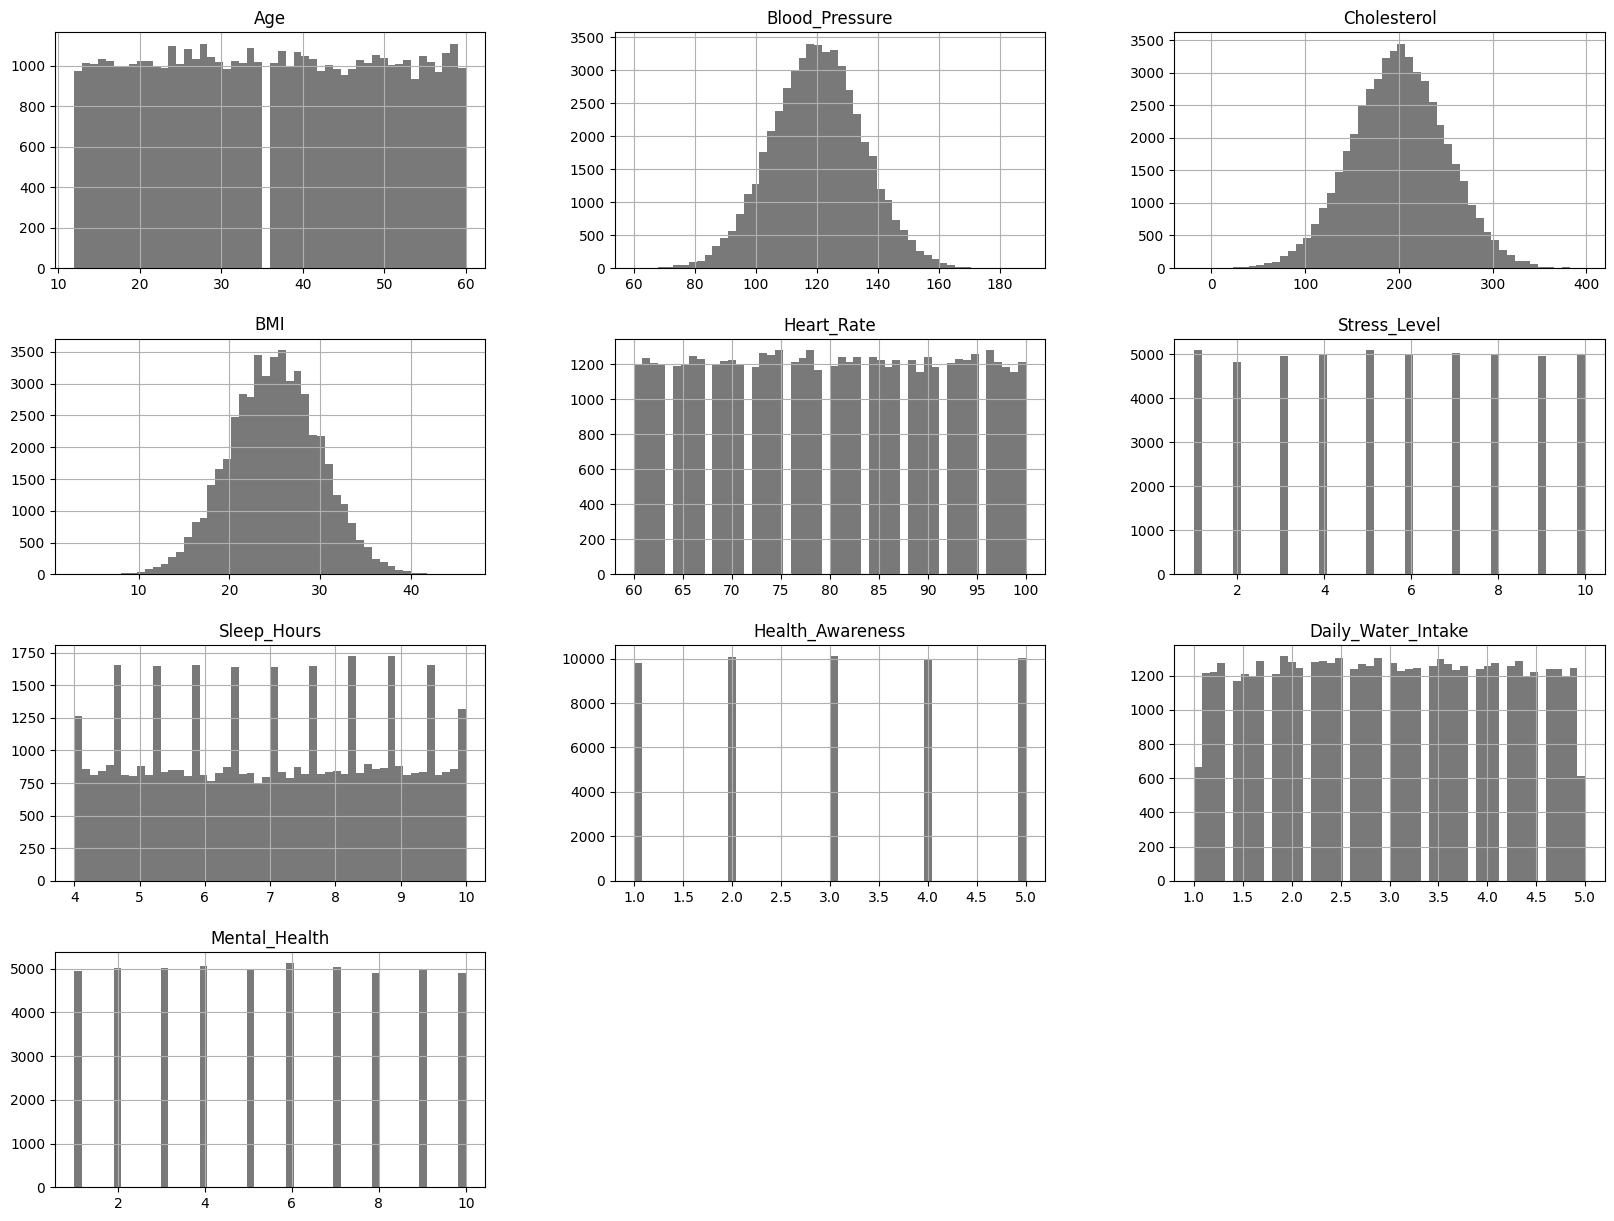

In [79]:
df.hist(bins=50, figsize=(20,15),color='#797979')

In [110]:
df_grouped = df.groupby(['Smoking']).agg(Total=('Smoking', 'count')).reset_index()
df_grouped

,Smoking,Total
0,False,35008
1,True,14992


In [17]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [19]:
axes

array([<Axes: title={'center': 'Contagem de Gender'}, xlabel='Gender', ylabel='count'>,
       <Axes: title={'center': 'Contagem de Region'}, xlabel='Region', ylabel='count'>,
       <Axes: title={'center': 'Contagem de Exercise_Level'}, xlabel='Exercise_Level', ylabel='count'>,
       <Axes: title={'center': 'Contagem de Smoking'}, xlabel='Smoking', ylabel='count'>,
       <Axes: title={'center': 'Contagem de Alcohol_Consumption'}, xlabel='Alcohol_Consumption', ylabel='count'>,
       <Axes: title={'center': 'Contagem de Diabetes'}, xlabel='Diabetes', ylabel='count'>,
       <Axes: title={'center': 'Contagem de Family_History'}, xlabel='Family_History', ylabel='count'>,
       <Axes: title={'center': 'Contagem de Heart_Attack'}, xlabel='Heart_Attack', ylabel='count'>,
       <Axes: title={'center': 'Contagem de Angina'}, xlabel='Angina', ylabel='count'>,
       <Axes: title={'center': 'Contagem de Heart_Disease_History'}, xlabel='Heart_Disease_History', ylabel='count'>,
       <Axes: 

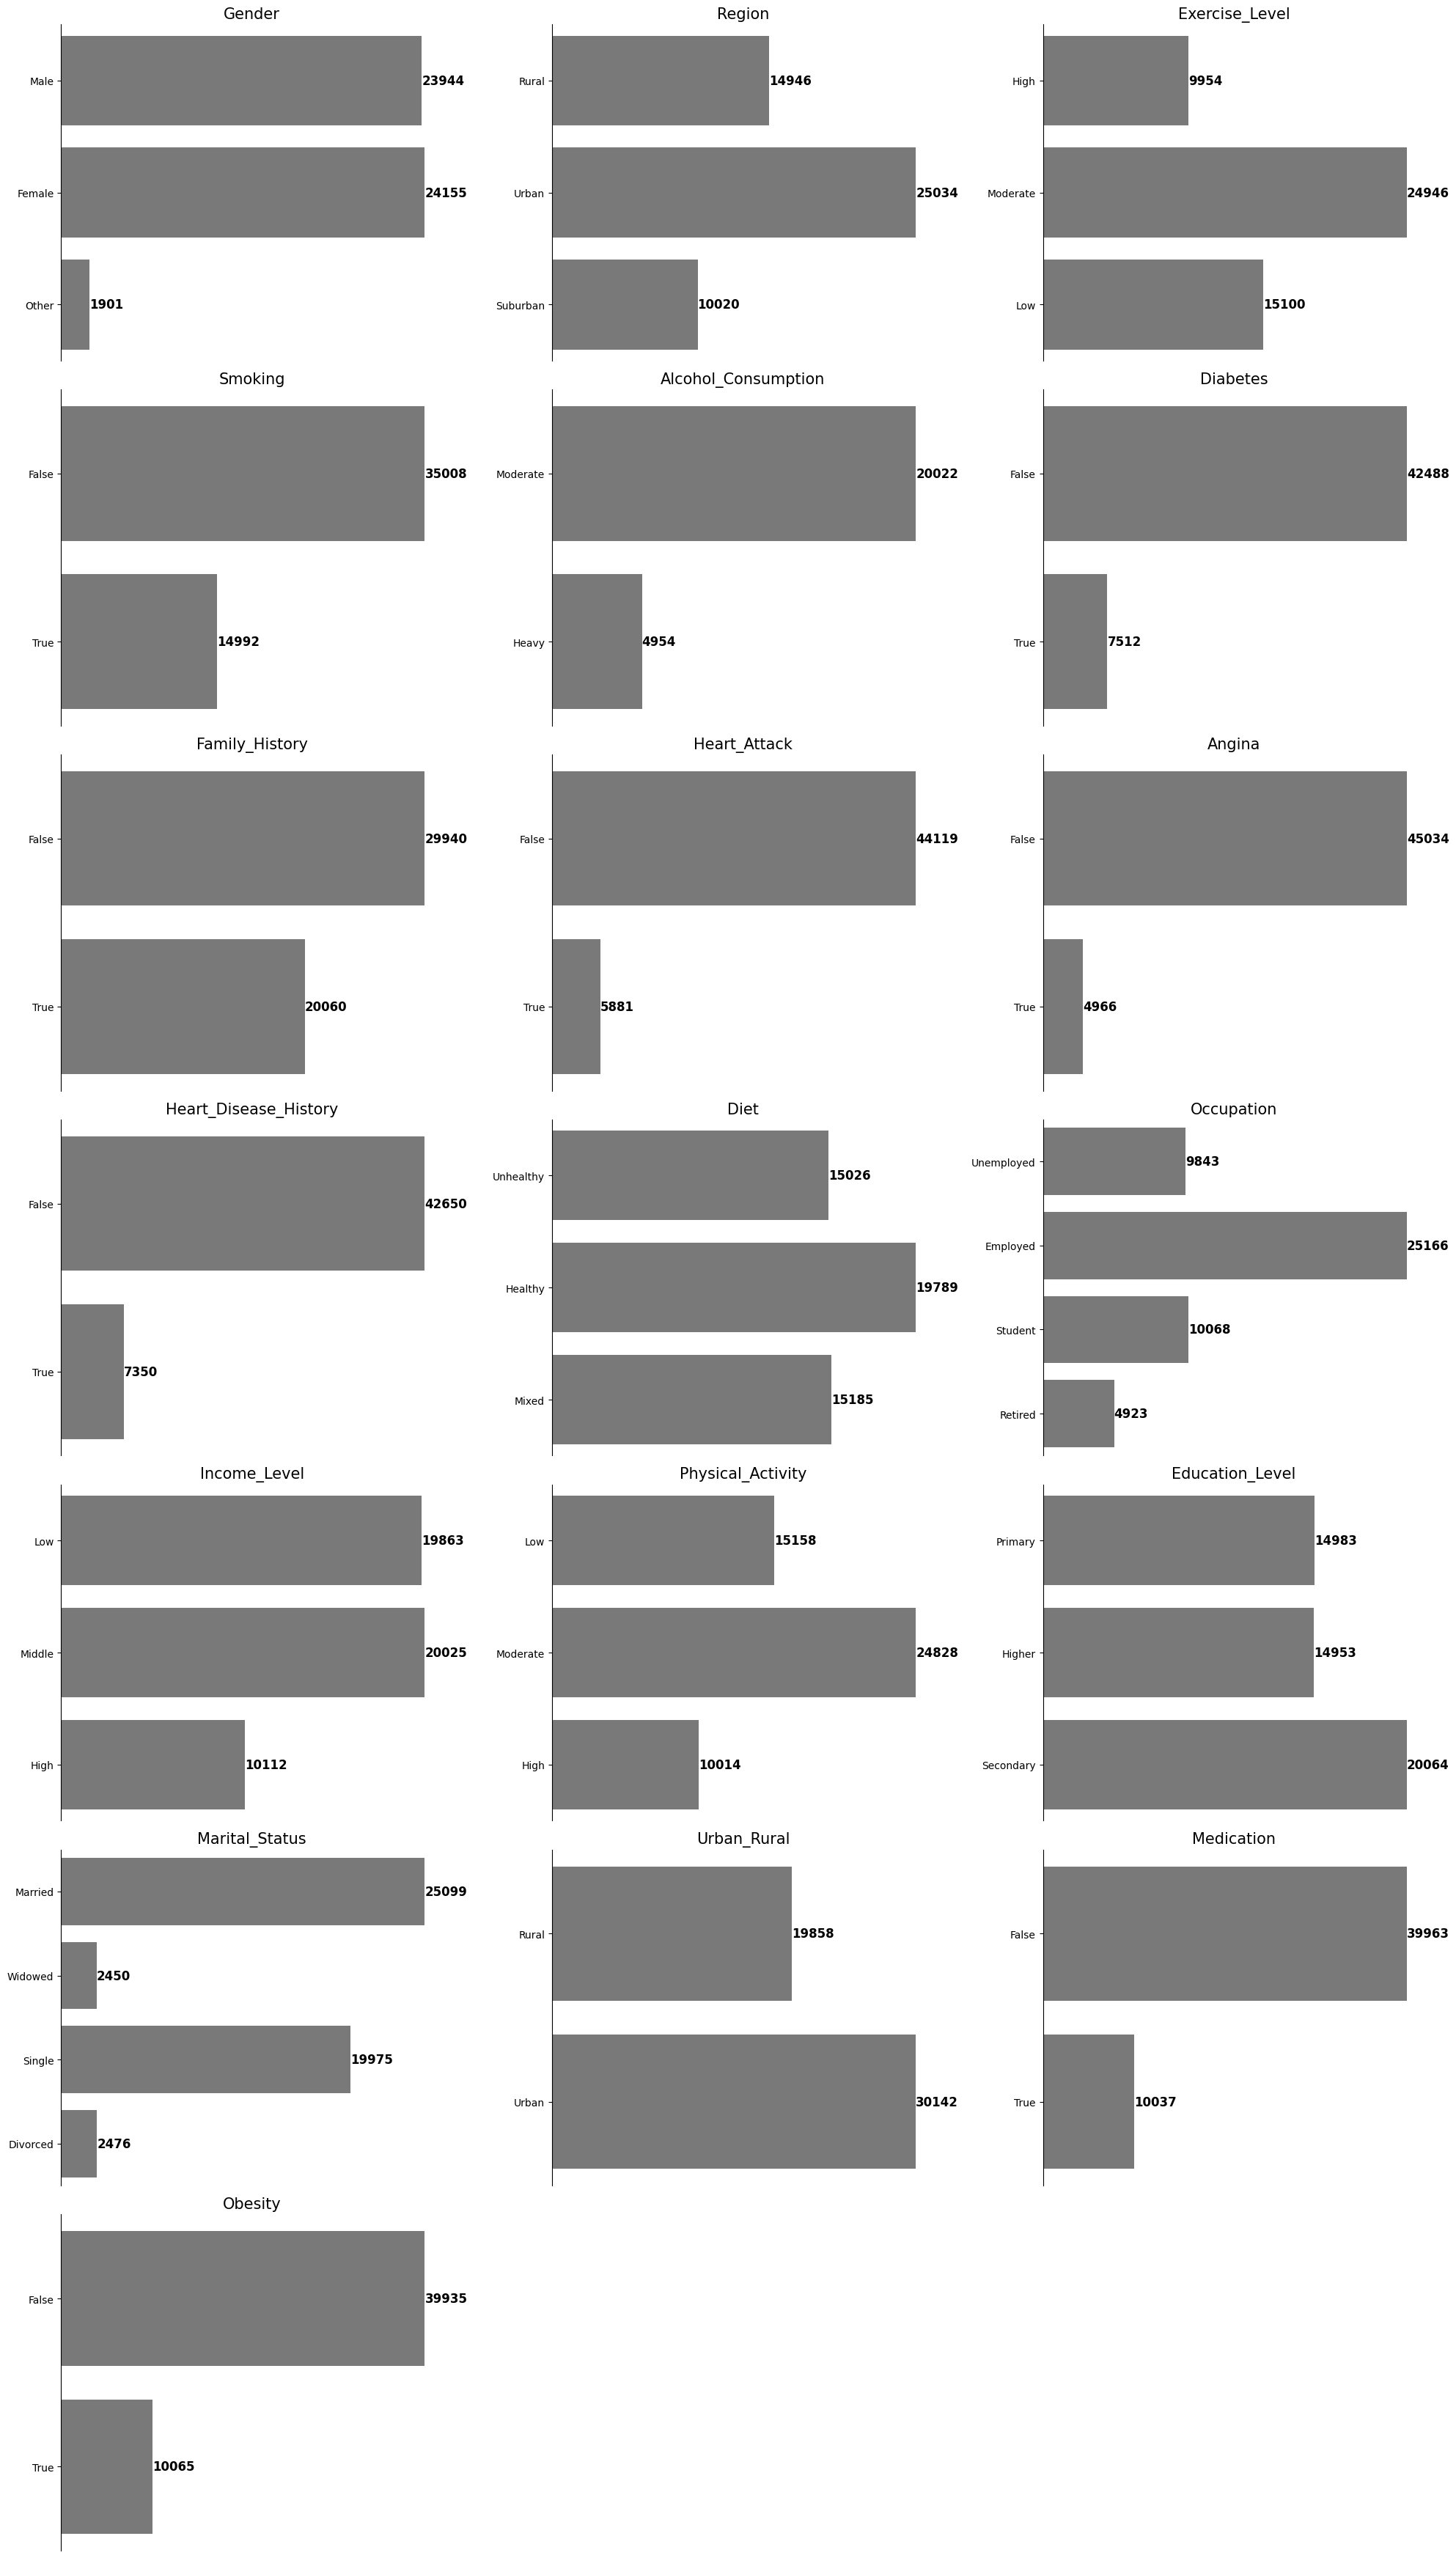

In [38]:
num_vars = len(categorical_features)
num_cols = 3 
num_rows = (num_vars // num_cols) + (1 if num_vars % num_cols != 0 else 0)

# Criando uma figura com subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))
axes = axes.flatten()  

# Loop para plotar cada variável categórica
for num, feature in enumerate(categorical_features):
    sns.countplot(y=feature, data=df, ax=axes[num],color="#797979")
    axes[num].set_title(f'{feature}',fontsize= 15)
    axes[num].set_xlabel("")
    axes[num].set_ylabel("")
    axes[num].spines["top"].set_visible(False) 
    axes[num].spines["right"].set_visible(False) 
    axes[num].spines["bottom"].set_visible(False) 
    axes[num].tick_params(axis='x', which='both', bottom=False, labelbottom=False)
     

    for bar in axes[num].patches:
        count = bar.get_width()
        x = count + 0.5  # Centralizar o rótulo na barra
        y = bar.get_y() + bar.get_height() / 2  # Centralizar o rótulo verticalmente
        axes[num].text(x, y, f'{int(count)}', ha='left', va='center', fontsize=12, color='black',fontweight='bold')    

# Removendo gráficos vazios
for i in range(num_vars, len(axes)):  
    axes[i].axis("off")

plt.tight_layout()
plt.show() 

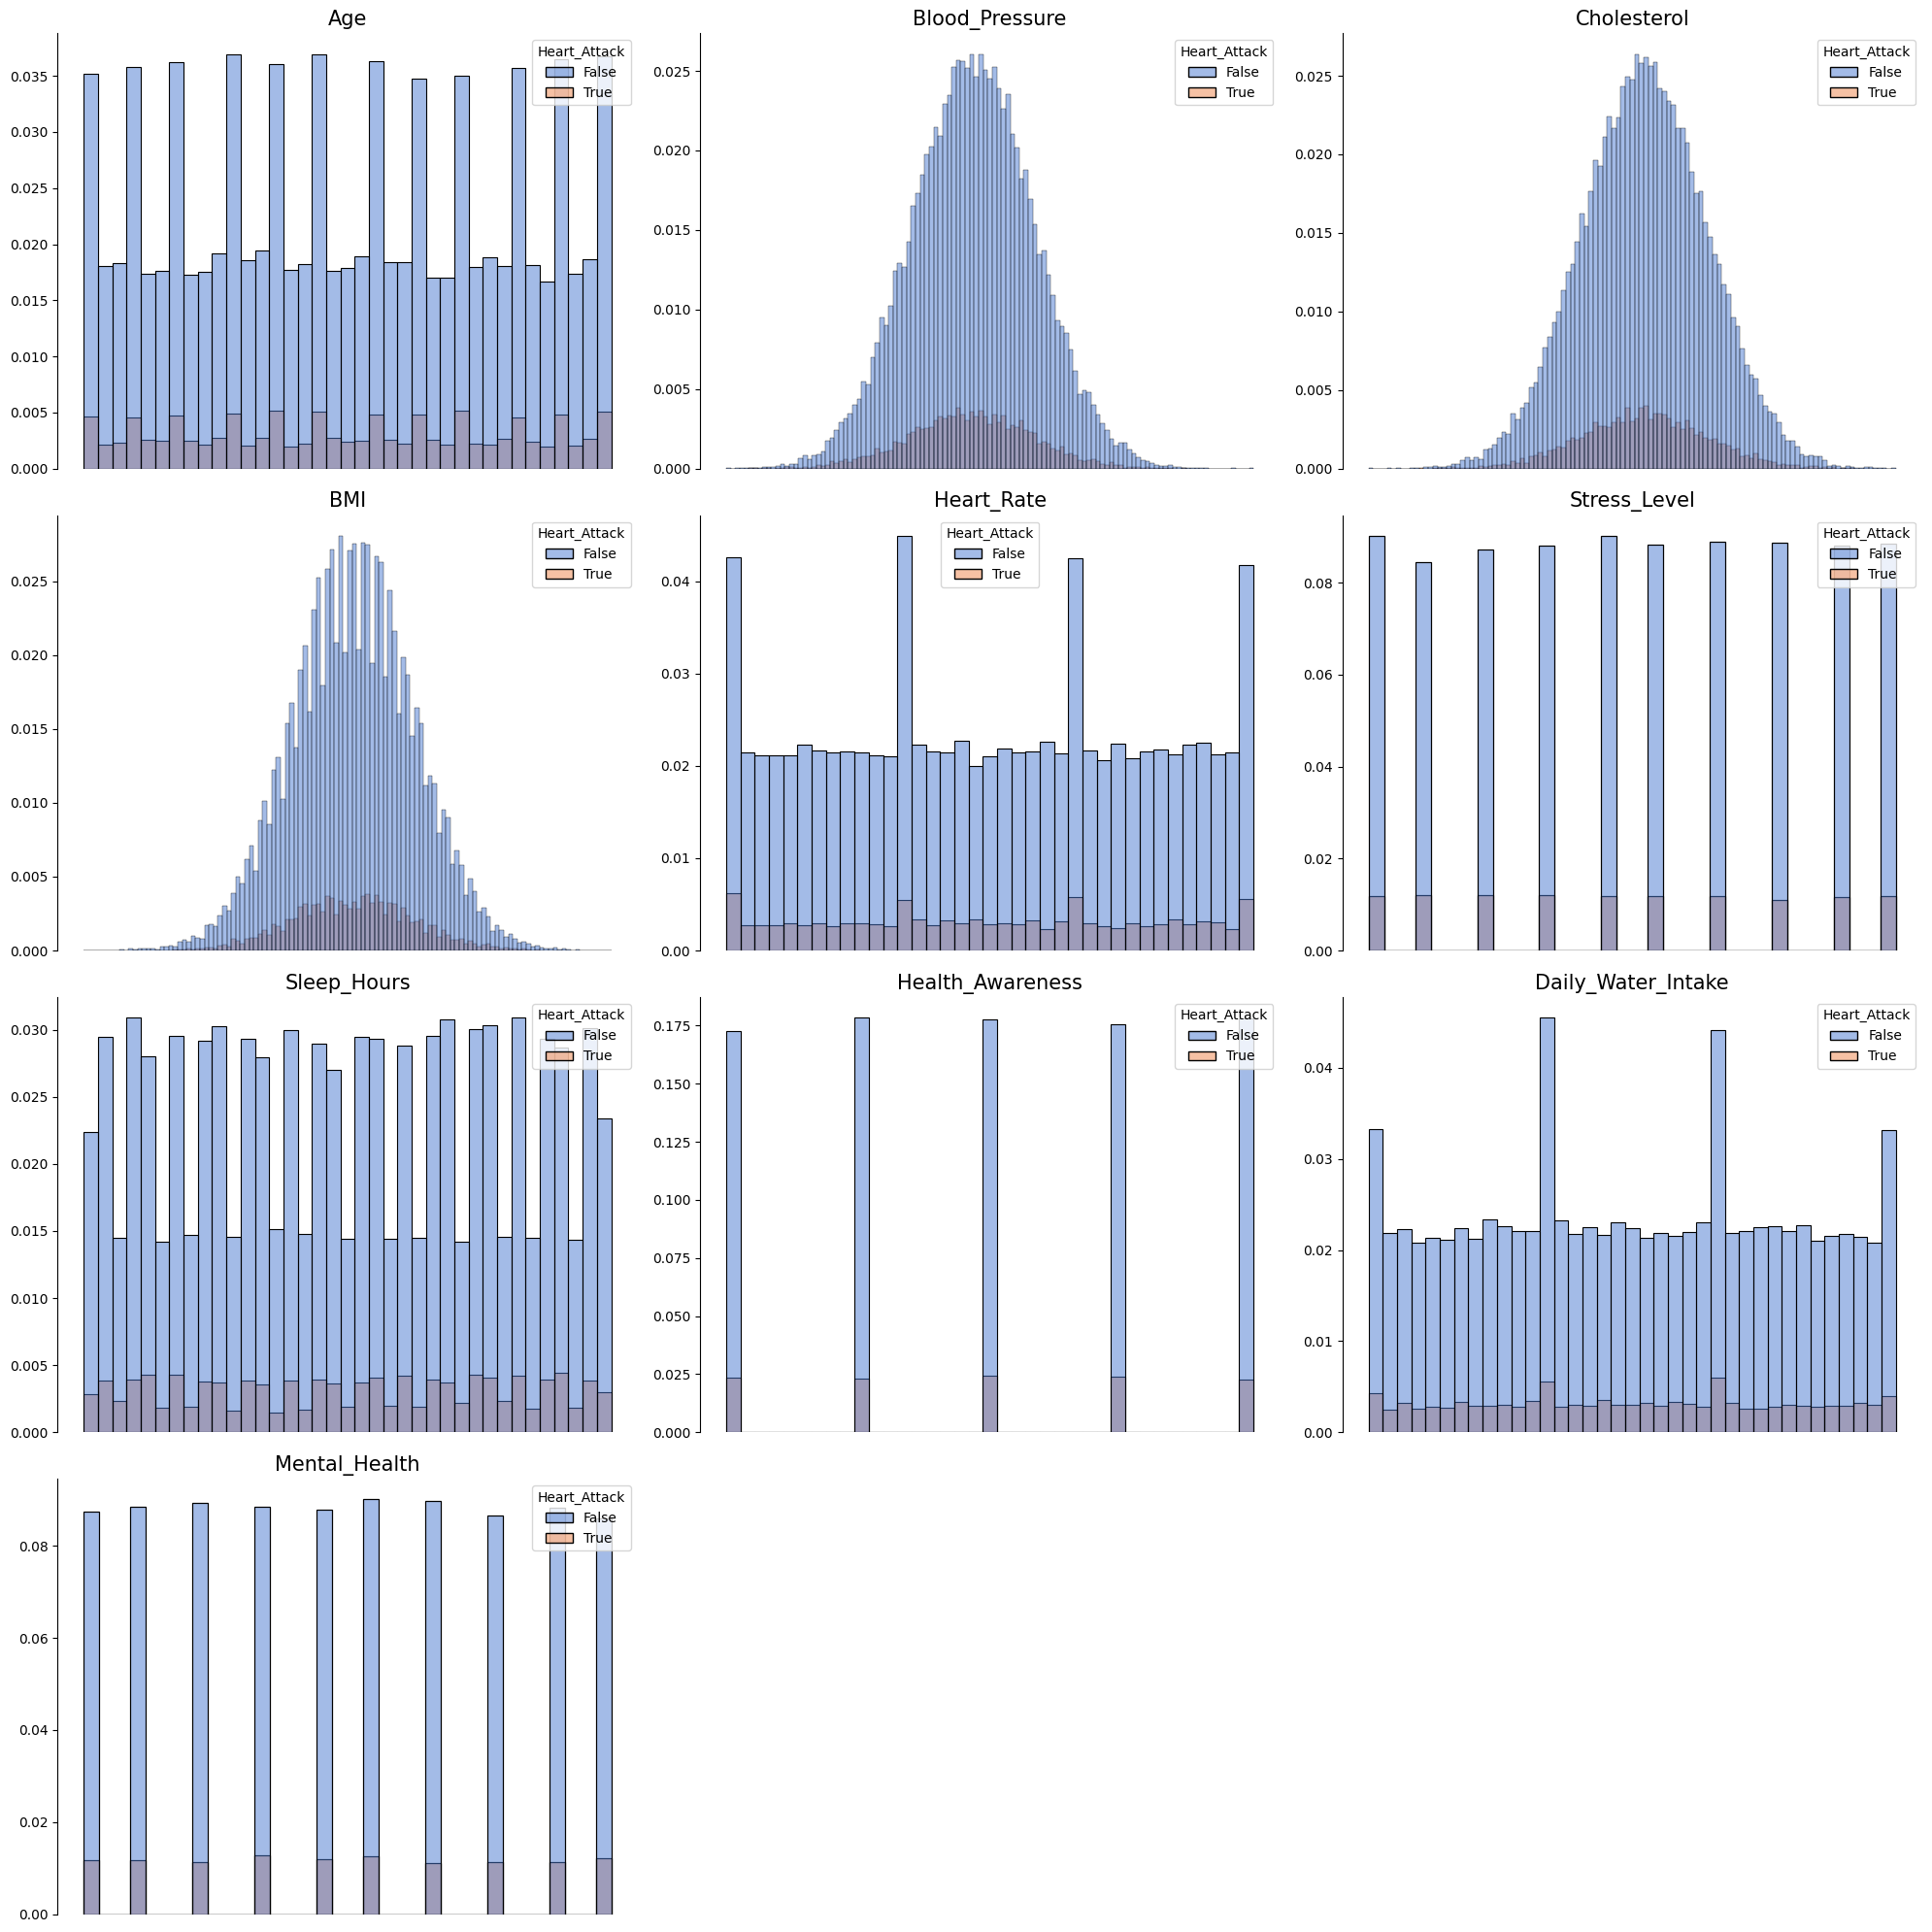

In [48]:
num_vars = len(numerical_features)
num_cols = 3 
num_rows = (num_vars // num_cols) + (1 if num_vars % num_cols != 0 else 0)

# Criando uma figura com subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))
axes = axes.flatten()  

# Loop para plotar cada variável categórica
for num, feature in enumerate(numerical_features):
    sns.histplot(x=feature, data=df,hue='Heart_Attack', ax=axes[num],stat='proportion',palette='muted')
    axes[num].set_title(f'{feature}',fontsize= 15)
    axes[num].set_xlabel("")
    axes[num].set_ylabel("")
    axes[num].spines["top"].set_visible(False) 
    axes[num].spines["right"].set_visible(False) 
    axes[num].spines["bottom"].set_visible(False) 
    axes[num].tick_params(axis='x', which='both', bottom=False, labelbottom=False)
         
# Removendo gráficos vazios
for i in range(num_vars, len(axes)):  
    axes[i].axis("off")

plt.tight_layout()
plt.show() 

## Comentários breves:

### Aparentemente não há muitos problemas nos dados, tem uma coluna que não é específicado o que é `Urban_Rural` e tem a `Region`.  A única coluna com valores nulos é para consumo de álcool (`Alcohol_Consumption`). Existe dois pacientes com valores negativos no colesterol.

# 1. Existe diferença na ocorrência de ataques cardíacos entre homens e mulheres? Além disso, existe diferença na faixa etária?

### Objetivos:
- Exibir a ocorrência de casos para homens e para mulheres
- Exibir o número de casos de cada gênero pela faixa etária

In [41]:
# Agrupando pelo gênero e somando a quantidade de pessoas que tiveram caso
df_heart_atck_by_gender = df.groupby('Gender')['Heart_Attack'].sum()

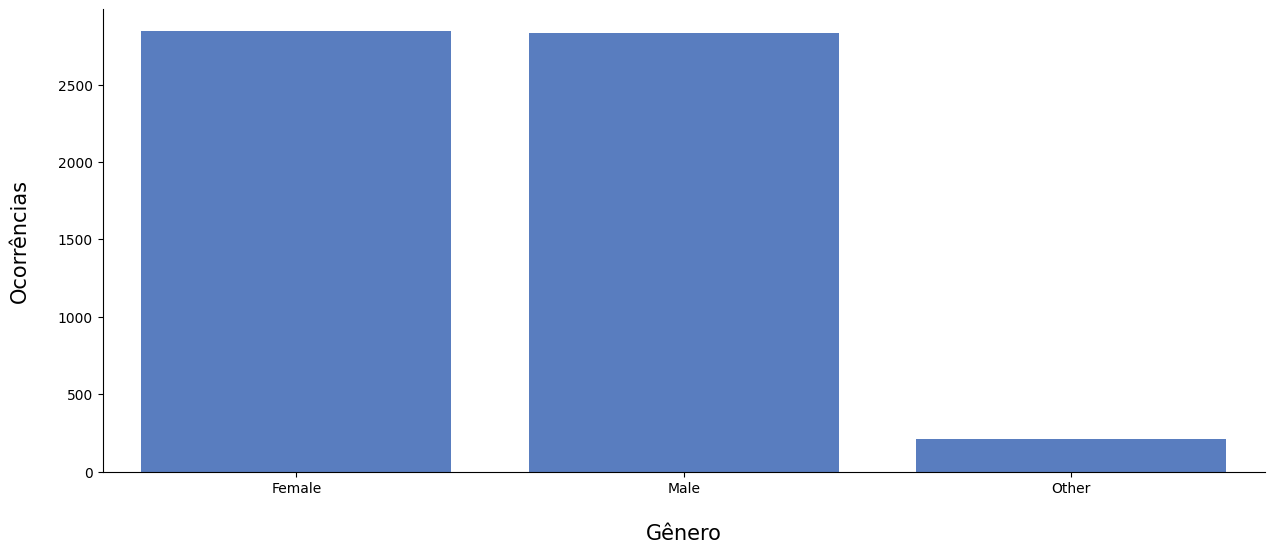

In [27]:
plt.figure(figsize=(15, 6))
ax = sns.barplot(df_heart_atck_by_gender)
sns.despine(top=True)
ax.set_ylabel('Ocorrências', fontsize=15,labelpad = 20)
ax.set_xlabel('Gênero', fontsize=15,labelpad = 20)

plt.show()

In [28]:
# Separando em feixa etária a idade 5 em 5 anos
df['Age_Group'] = pd.cut(df['Age'], bins=range(10, 65, 5))

# Agrupando por faixa etária removendo os outros, e somando as ocorrencias
df_occurrences_by_age_and_gender = df[(df['Heart_Attack']) & (df['Gender']!='Other')].groupby(['Gender','Age_Group'],observed=True)['Heart_Attack'].sum().reset_index()

# Transformando em string
df_occurrences_by_age_and_gender['Age_Group'] = df_occurrences_by_age_and_gender['Age_Group'].astype(str)

df_occurrences_by_age_and_gender

,Gender,Age_Group,Heart_Attack
0,Female,"(10, 15]",219
1,Female,"(15, 20]",305
2,Female,"(20, 25]",297
3,Female,"(25, 30]",297
4,Female,"(30, 35]",296
5,Female,"(35, 40]",311
6,Female,"(40, 45]",283
7,Female,"(45, 50]",279
8,Female,"(50, 55]",287
9,Female,"(55, 60]",269


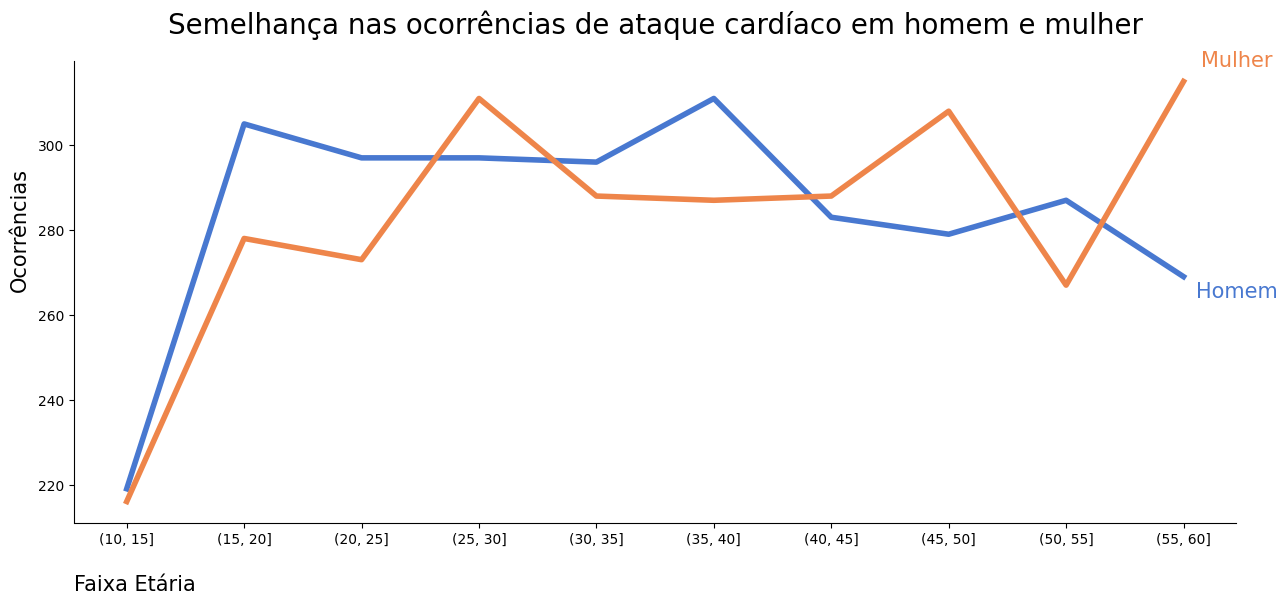

In [35]:
# Construindo o gráfico
plt.figure(figsize=(15, 6))

ax = sns.lineplot(y='Heart_Attack',x='Age_Group',hue='Gender',data=df_occurrences_by_age_and_gender,linewidth=4)
ax.set_ylabel('Ocorrências', fontsize=15,labelpad = 20, verticalalignment='top', horizontalalignment='left')
ax.set_xlabel('Faixa Etária', fontsize=15,labelpad = 20, loc='left')
ax.set_title('Semelhança nas ocorrências de ataque cardíaco em homem e mulher',fontsize= 20, pad = 20,horizontalalignment='center')

# Removendo linhas de grade para maior clareza
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False) 

ax.legend().set_visible(False)
ax.text(1, 1, "Mulher", ha='center', va='center', transform=ax.transAxes, fontsize=15, color='#EE854A')
ax.text(1, 0.5, "Homem", ha='center', va='center', transform=ax.transAxes, fontsize=15, color ='#4878D0')
plt.show()

In [11]:
z_scores = stats.zscore(df_occurrences_by_age_and_gender['Heart_Attack'])

# Filtrar outliers
outliers = df_occurrences_by_age_and_gender[np.abs(z_scores) > 2]  # Usando 2 como o limite

print("Outliers detectados:")
print(outliers)

Outliers detectados:
    Gender Age_Group  Heart_Attack
0   Female  (10, 15]           219
10    Male  (10, 15]           216


## Conclusões:
Não há uma diferença entre a quantidade de casos em homem e em mulheres, além disso , não foi evidenciado nenhuma faixa de valor em que ocorrece mais casos, porém faixas etárias menores não exibem uma quantidade grande de casos, a princípio a partir dos 30 anos parece haver uma constância de casos tanto para homens quanto para mulheres.

# 2. Existe uma relação entre o índice de massa corporal (IMC) e a chance de um ataque cardíaco?
### Objetivos:
- Conseguir verificar por um teste de hipóteses se há diferença entre os IMC's de dois grupos, das pessoas que tiveram ataque cardíaco e as que não tiveram.

In [3]:
# Pegando os IMC's das pessoas que tiveram ataque cardíaco
df_bmi_heart_atck = df.loc[df['Heart_Attack'],'BMI']

# Pegando os IMC's das pessoas que não tiveram ataque cardíaco
df_bmi_not_heart_atck = df.loc[~df['Heart_Attack'],'BMI']

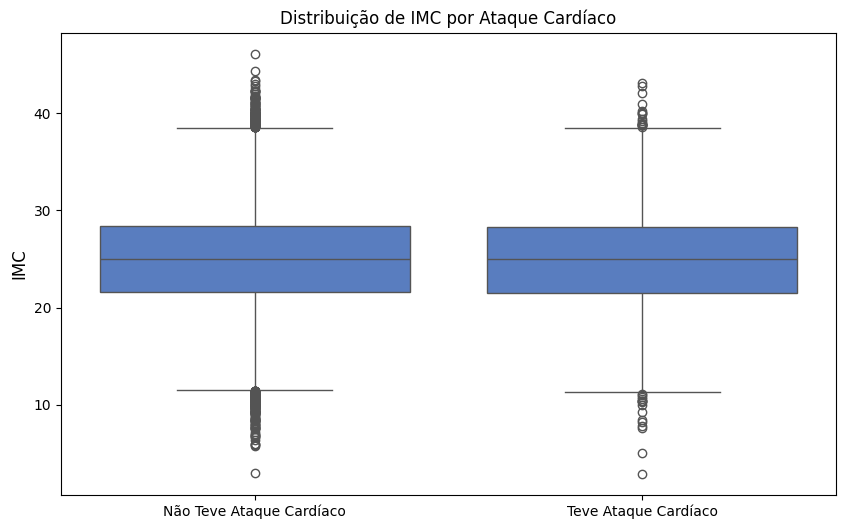

In [20]:
# Criando um boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Heart_Attack',y='BMI',data = df)

# Trocando o que false e true
ax.set_xticks([0, 1], ['Não Teve Ataque Cardíaco', 'Teve Ataque Cardíaco'])  

# Nomeando o gráfico
ax.set_ylabel('IMC',fontsize = 12)  
ax.set_xlabel('')
ax.set_title('Distribuição de IMC por Ataque Cardíaco')

plt.show()

Text(0, 0.5, '')

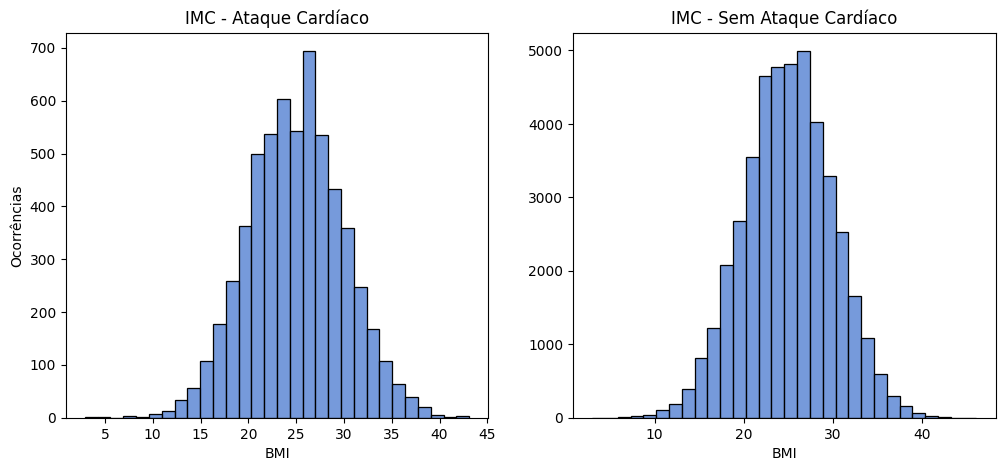

In [10]:
fig, axes = plt.subplots(1,2,figsize=(12, 5))

sns.histplot(data = df_bmi_heart_atck,ax=axes[0],bins=30)
axes[0].set_title('IMC - Ataque Cardíaco')
axes[0].set_ylabel('Ocorrências')
sns.histplot(data = df_bmi_not_heart_atck,ax=axes[1],bins=30)
axes[1].set_title('IMC - Sem Ataque Cardíaco')
axes[1].set_ylabel('')
# Removendo a borda do topo e da direita
#axes[1].spines['top'].set_visible(False)


In [11]:
def check_normality(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    print("p value:%.4f" % p_value_normality)
    if p_value_normality <0.05:
        print("Rejeita hipótese nula . Os dados não são normalmente distríbuidos")
    else:
        print("Falhou em rejeitar a hipótese nula . Os dados são normalmente distríbuidos")

In [12]:
check_normality(df_bmi_heart_atck.to_list())
check_normality(df_bmi_not_heart_atck.to_list())

p value:0.2788
Falhou em rejeitar a hipótese nula . Os dados são normalmente distríbuidos
p value:0.3236
Falhou em rejeitar a hipótese nula . Os dados são normalmente distríbuidos


c:\Users\Fiuza\Desktop\Projetos\HeartAttack\Heart-Attack-Prediction\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5881.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Fiuza\Desktop\Projetos\HeartAttack\Heart-Attack-Prediction\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 44119.
  res = hypotest_fun_out(*samples, **kwds)


In [14]:
def check_variance_homogeneity(group1, group2):
    test_stat_var, p_value_var= stats.levene(group1,group2)
    print("p value:%.4f" % p_value_var)
    if p_value_var <0.05:
        print("Rejeita hipótese nula . A viriância das amostras são diferentes.")
    else:
        print("Falhou em rejeitar a hipótese nula . A viriância das amostras são as mesmas.")

In [15]:
check_variance_homogeneity(df_bmi_heart_atck.to_list(),df_bmi_not_heart_atck.to_list())

p value:0.8599
Falhou em rejeitar a hipótese nula . A viriância das amostras são as mesmas.


In [19]:
ttest,p_value = stats.ttest_ind(df_bmi_heart_atck.to_list(),df_bmi_not_heart_atck.to_list())
print("p value:%.8f" % p_value)
if p_value <0.05:
    print("Há diferença significativa entre os IMCs dos dois grupos.")
else:
    print("Não há diferença significativa entre os IMC's entre os dois grupos")

p value:0.90639287
Não há diferença significativa entre os IMC's entre os dois grupos


## Conclusões:
Não houve diferença significativa estre os dois grupos, parece não haver uma relação nessa base entre esse índice e os casos. Pelo índice não levar em consideração a distribuição de gordura corporal, e apenas uma relação entre altura e peso , talvez esse resultado tenha sido por isso, outra coisa, pode ser o tamanho da amostra tendo em vista que há bem mais pessoas com não tiveram o caso do que pessoas que tiveram.

# 3.Quais são as características demográficas mais comuns entre os pacientes que tiveram um ataque cardíaco (idade, sexo, região, etc.)?

### Objetivos:
- Tentar econtrar uma maior proporção de casos em determinada região.

In [5]:
df_by_region = df.loc[df['Heart_Attack'],'Region']

In [28]:
df.loc[df['Heart_Attack'],'Region'].value_counts(normalize=True)

Region
Urban       0.493794
Rural       0.300969
Suburban    0.205237
Name: proportion, dtype: float64

In [29]:
df.loc[~df['Heart_Attack'],'Region'].value_counts(normalize=True)

Region
Urban       0.501598
Rural       0.298647
Suburban    0.199755
Name: proportion, dtype: float64

In [68]:
# Contar ataques cardíacos e não ataques cardíacos por região
heart_attack_counts = df[df['Heart_Attack']]['Region'].value_counts(normalize=True)
no_heart_attack_counts = df[~df['Heart_Attack']]['Region'].value_counts(normalize=True)

# Combinar as contagens em um DataFrame
stacked_data = pd.DataFrame({
    'Heart_Attack': heart_attack_counts,
    'No_Heart_Attack': no_heart_attack_counts
}).T


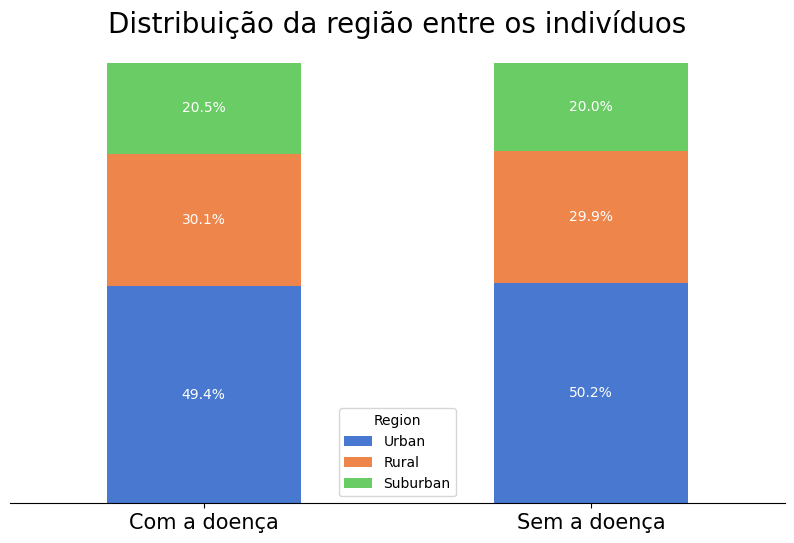

In [85]:
ax = stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.grid(False)
ax.yaxis.set_visible(False)
ax.set_xticks(range(2),['Com a doença','Sem a doença'])
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15,rotation=0, ha='center')
ax.set_title('Distribuição da região entre os indivíduos',fontsize=20)
sns.despine(left=True)
for container in ax.containers:
    
    for bar in container:
        if bar.get_height() > 0:
            height = bar.get_height()
            x = bar.get_x() + bar.get_width() / 2  # Centralizar o rótulo na barra
            y = bar.get_y() + height / 2  # Centralizar o rótulo verticalmente
            ax.text(x, y, f'{height*100:.1f}%', ha='center', va='center', fontsize=10, color='white')

plt.show()

## Conclusão:
- Não há uma diferença significativa pela região, e por conta dos valores serem bem parelhos, eu diria que provavelmente seja uma amostra estratificada da base.

# 4. Quem faz atividade física tem menos casos de ataque cardíaco?

In [36]:
df.loc[df['Heart_Attack'],'Exercise_Level'].value_counts(normalize=True)

Exercise_Level
Moderate    0.499235
Low         0.301139
High        0.199626
Name: proportion, dtype: float64

In [34]:
df.loc[~df['Heart_Attack'],'Exercise_Level'].value_counts(normalize=True)

Exercise_Level
Moderate    0.498878
Low         0.302115
High        0.199007
Name: proportion, dtype: float64

In [94]:
# Contar ataques cardíacos e não ataques cardíacos por exercício
heart_attack_counts = df[df['Heart_Attack']]['Exercise_Level'].value_counts(normalize=True)
no_heart_attack_counts = df[~df['Heart_Attack']]['Exercise_Level'].value_counts(normalize=True)

# Combinar as contagens em um DataFrame
stacked_data = pd.DataFrame({
    'Heart_Attack': heart_attack_counts,
    'No_Heart_Attack': no_heart_attack_counts
}).T

stacked_data


Exercise_Level,Moderate,Low,High
Heart_Attack,0.499235,0.301139,0.199626
No_Heart_Attack,0.498878,0.302115,0.199007


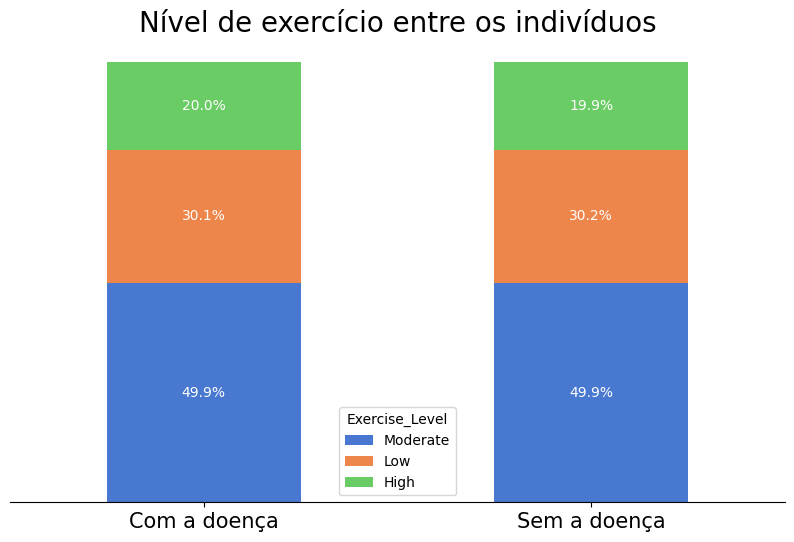

In [95]:
ax = stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.grid(False)
ax.yaxis.set_visible(False)
ax.set_xticks(range(2),['Com a doença','Sem a doença'])
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15,rotation=0, ha='center')
ax.set_title('Nível de exercício entre os indivíduos',fontsize=20)
sns.despine(left=True)
for container in ax.containers:
    
    for bar in container:
        if bar.get_height() > 0:
            height = bar.get_height()
            x = bar.get_x() + bar.get_width() / 2  # Centralizar o rótulo na barra
            y = bar.get_y() + height / 2  # Centralizar o rótulo verticalmente
            ax.text(x, y, f'{height*100:.1f}%', ha='center', va='center', fontsize=10, color='white')

plt.show()

## Conclusões:
- Parece ser o mesmo caso que o da região onde parece não haver diferença entre os indivíduos

# 5. Qual é o impacto do histórico familiar na ocorrência de ataques cardíacos?

In [99]:
df.loc[df['Heart_Attack'],'Heart_Disease_History'].value_counts(normalize=True)

Heart_Disease_History
False    0.857337
True     0.142663
Name: proportion, dtype: float64

In [100]:
df.loc[~df['Heart_Attack'],'Heart_Disease_History'].value_counts(normalize=True)

Heart_Disease_History
False    0.852422
True     0.147578
Name: proportion, dtype: float64

In [101]:
# Contar ataques cardíacos e não ataques cardíacos por histórico de doença
heart_attack_counts = df[df['Heart_Attack']]['Heart_Disease_History'].value_counts(normalize=True)
no_heart_attack_counts = df[~df['Heart_Attack']]['Heart_Disease_History'].value_counts(normalize=True)

# Combinar as contagens em um DataFrame
stacked_data = pd.DataFrame({
    'Heart_Attack': heart_attack_counts,
    'No_Heart_Attack': no_heart_attack_counts
}).T

stacked_data

Heart_Disease_History,False,True
Heart_Attack,0.857337,0.142663
No_Heart_Attack,0.852422,0.147578


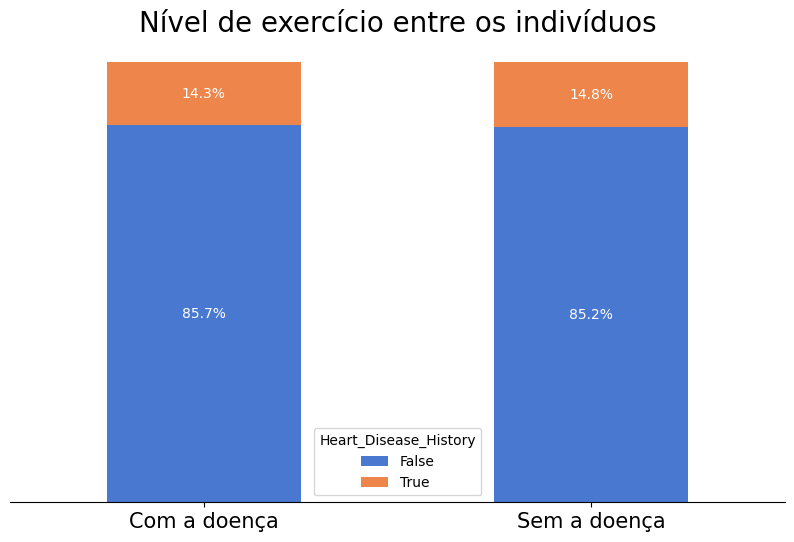

In [102]:
ax = stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.grid(False)
ax.yaxis.set_visible(False)
ax.set_xticks(range(2),['Com a doença','Sem a doença'])
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15,rotation=0, ha='center')
ax.set_title('Nível de exercício entre os indivíduos',fontsize=20)
sns.despine(left=True)
for container in ax.containers:
    
    for bar in container:
        if bar.get_height() > 0:
            height = bar.get_height()
            x = bar.get_x() + bar.get_width() / 2  # Centralizar o rótulo na barra
            y = bar.get_y() + height / 2  # Centralizar o rótulo verticalmente
            ax.text(x, y, f'{height*100:.1f}%', ha='center', va='center', fontsize=10, color='white')

plt.show()

## Conclusões:
- Mesmo caso da região e do nível de exercício

# 6. Qual é a distribuição de níveis de colesterol entre os pacientes com e sem ataques cardíacos?

In [103]:
df.columns

Index(['ID', 'Age', 'Gender', 'Region', 'Blood_Pressure', 'Cholesterol', 'BMI',
       'Heart_Rate', 'Exercise_Level', 'Smoking', 'Alcohol_Consumption',
       'Diabetes', 'Family_History', 'Stress_Level', 'Heart_Attack', 'Angina',
       'Heart_Disease_History', 'Diet', 'Sleep_Hours', 'Occupation',
       'Income_Level', 'Physical_Activity', 'Education_Level',
       'Marital_Status', 'Urban_Rural', 'Medication', 'Health_Awareness',
       'Daily_Water_Intake', 'Mental_Health', 'Obesity'],
      dtype='object')

Text(0.5, 0, '')

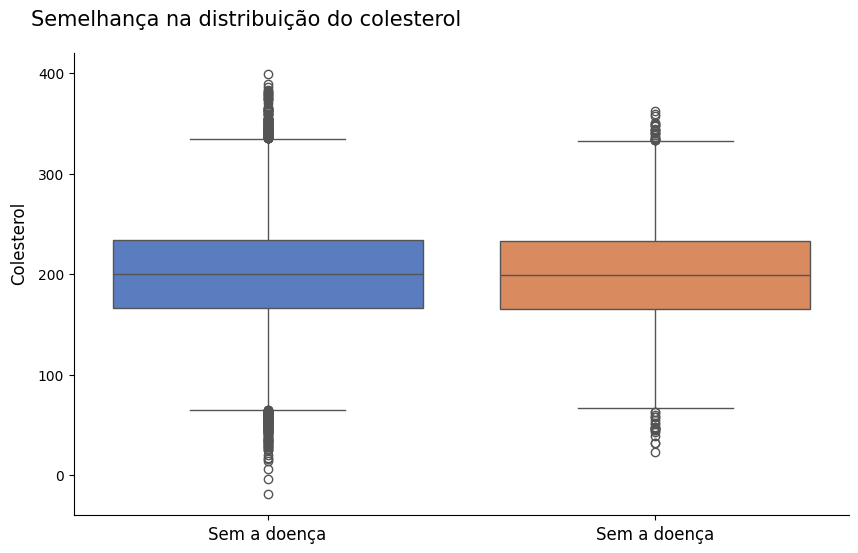

In [50]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Heart_Attack',y='Cholesterol',data=df, hue='Heart_Attack' )
sns.despine(top=True)
ax.legend().set_visible(False)
ax.set_title('Semelhança na distribuição do colesterol', fontsize= 15,horizontalalignment='right',pad = 20)
ax.set_xticks(range(2),['Sem a doença','Sem a doença'])
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_ylabel('Colesterol',fontsize=12, verticalalignment='top', horizontalalignment='left',labelpad= 20)
ax.set_xlabel("")

## Conclusões:
- Podemos observar que há alguns outliers em ambos,mais para as pessoas que não tiveram a doença, mas isso provavelmente se deve ao fato de serem classes desbalanceadas. Ademais, observando as duas amostras assim não parece haver diferença a 

# 7. Quais variáveis (idade, pressão arterial, colesterol, etc.) têm maior correlação com a ocorrência de ataques cardíacos?

In [49]:
corr_matrix = df.corr(numeric_only= True)

In [56]:
corr_matrix['Heart_Attack'].sort_values(ascending=False)

Heart_Attack             1.000000
Smoking                  0.010113
Sleep_Hours              0.003141
Angina                   0.002055
Daily_Water_Intake       0.001709
Age                      0.000841
Family_History           0.000322
BMI                     -0.000526
Mental_Health           -0.000619
Obesity                 -0.000750
Heart_Rate              -0.002241
Cholesterol             -0.003397
Health_Awareness        -0.003775
Heart_Disease_History   -0.004472
Diabetes                -0.004789
Stress_Level            -0.005845
Medication              -0.006285
Blood_Pressure          -0.010560
Name: Heart_Attack, dtype: float64

In [60]:
corr_matrix['Heart_Attack'].index

Index(['Age', 'Blood_Pressure', 'Cholesterol', 'BMI', 'Heart_Rate', 'Smoking',
       'Diabetes', 'Family_History', 'Stress_Level', 'Heart_Attack', 'Angina',
       'Heart_Disease_History', 'Sleep_Hours', 'Medication',
       'Health_Awareness', 'Daily_Water_Intake', 'Mental_Health', 'Obesity'],
      dtype='object')

<Axes: >

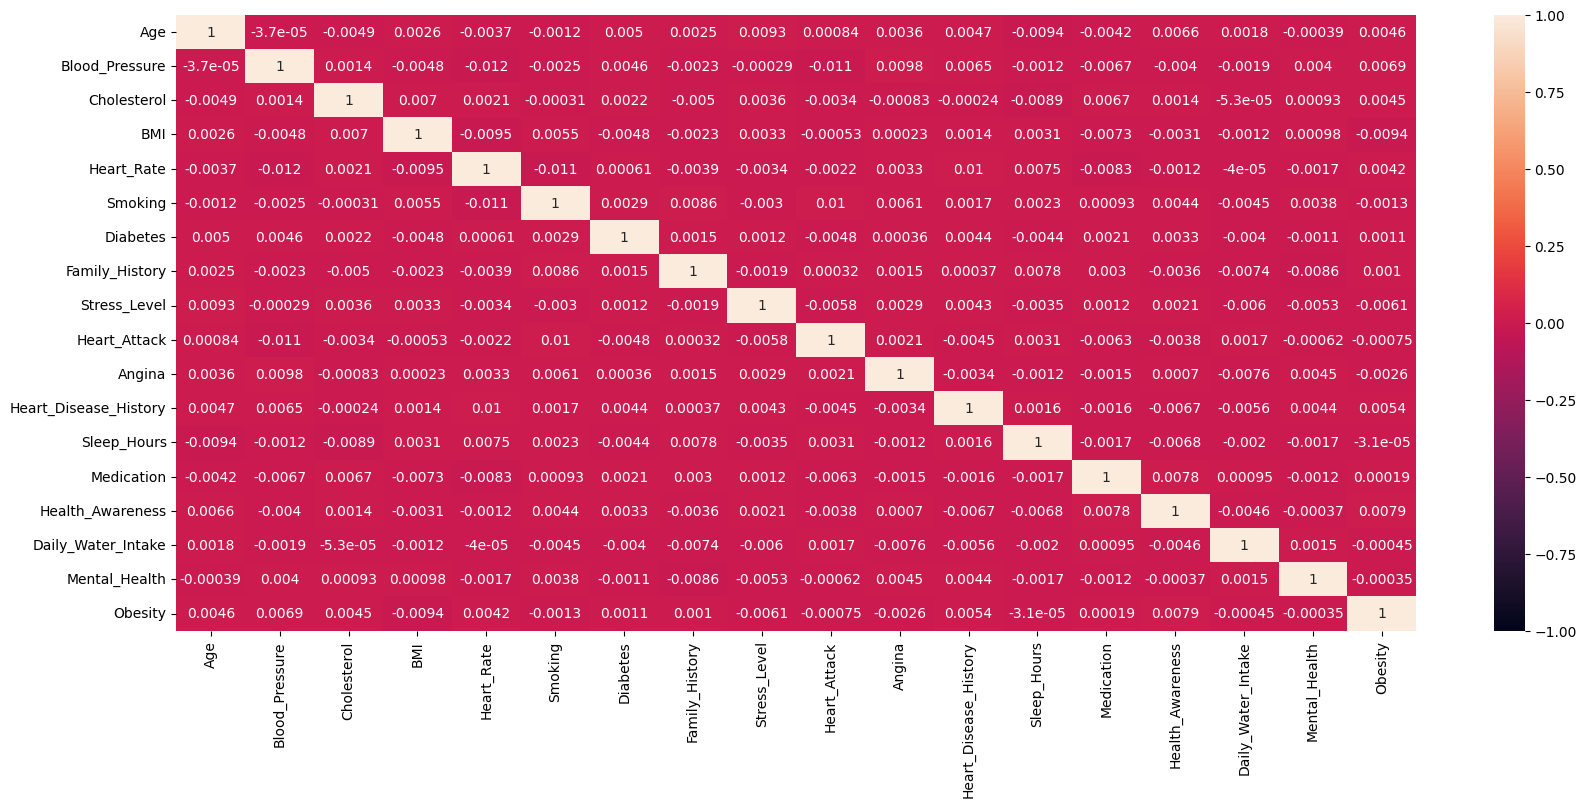

In [51]:
plt.figure(figsize=(20,8))
sns.heatmap(data=corr_matrix,vmin=-1,vmax=1,annot=True)

In [64]:
df_only_numeric = df.select_dtypes(include=[np.number,np.bool])
for numeric_column in df_only_numeric.columns:
    coef, p = spearmanr(df['Heart_Attack'], df[numeric_column])
    print(f"Coluna {numeric_column} ,Spearman: coef={coef}, p={p}")
    print("*Estatisticamente significativa*\n" if p < 0.05 else "Estatísticamente não significativa\n")

Coluna Age ,Spearman: coef=0.0008597857009843417, p=0.8475470426747591
Estatísticamente não significativa

Coluna Blood_Pressure ,Spearman: coef=-0.009612123645574412, p=0.03160808358471701
*Estatisticamente significativa*

Coluna Cholesterol ,Spearman: coef=-0.0036903735837083155, p=0.40927235866993883
Estatísticamente não significativa

Coluna BMI ,Spearman: coef=-0.0014906473500769643, p=0.738899738692331
Estatísticamente não significativa

Coluna Heart_Rate ,Spearman: coef=-0.002223682750805387, p=0.6190347915349126
Estatísticamente não significativa

Coluna Smoking ,Spearman: coef=0.01011335760684491, p=0.023733459461813333
*Estatisticamente significativa*

Coluna Diabetes ,Spearman: coef=-0.004788754301380906, p=0.28426953863471893
Estatísticamente não significativa

Coluna Family_History ,Spearman: coef=0.0003220715956775021, p=0.9425894934255479
Estatísticamente não significativa

Coluna Stress_Level ,Spearman: coef=-0.005855962676983443, p=0.1903949806232977
Estatísticamente n

## Conclusões:
- Apesar de haver uma certa correlação entre fumar e ter ataque do coração ela é bem fraca, também há uma correlação negativa entre a pressão do sangue que também é fraca, tentei utilizar a correlação não linear de Spearman, mas mesmo assim não houve tanta mundança , mas apenas disso houveram indícios de que algumas correlações observadas são estatísticamente significativas.

In [41]:
df.loc[~df['Heart_Attack'],'Diabetes'].value_counts(normalize=True)

Diabetes
False    0.849135
True     0.150865
Name: proportion, dtype: float64

In [42]:
df.loc[df['Heart_Attack'],'Diabetes'].value_counts(normalize=True)

Diabetes
False    0.854447
True     0.145553
Name: proportion, dtype: float64

In [44]:
df.loc[df['Heart_Attack']]

,ID,Age,Gender,Region,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Exercise_Level,Smoking,...,Income_Level,Physical_Activity,Education_Level,Marital_Status,Urban_Rural,Medication,Health_Awareness,Daily_Water_Intake,Mental_Health,Obesity
6,7,50,Male,Suburban,116.8,206.9,27.9,75,High,True,...,Middle,Moderate,Primary,Married,Urban,True,1,1.7,10,True
8,9,34,Male,Urban,131.8,244.6,24.4,65,Low,False,...,High,Moderate,Primary,Married,Rural,False,1,4.7,7,False
15,16,14,Female,Suburban,121.9,242.1,18.2,73,Moderate,False,...,Low,Low,Secondary,Married,Rural,True,1,1.4,2,False
21,22,49,Male,Urban,120.9,202.9,25.8,63,High,False,...,Low,Moderate,Secondary,Married,Rural,False,4,1.8,3,False
28,29,36,Male,Rural,104.8,241.8,24.2,98,High,False,...,Low,High,Secondary,Single,Urban,True,5,3.5,7,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49978,49979,53,Female,Urban,153.3,217.1,20.5,61,Moderate,False,...,Middle,High,Primary,Single,Rural,False,5,2.8,9,False
49982,49983,24,Female,Rural,65.7,200.1,24.0,99,Moderate,True,...,Middle,Low,Secondary,Married,Urban,False,4,2.4,2,False
49988,49989,53,Male,Rural,133.4,195.9,29.7,71,Low,True,...,Middle,Low,Primary,Single,Urban,False,4,2.5,10,False
49991,49992,50,Male,Suburban,134.0,230.7,26.2,97,Moderate,True,...,Middle,Moderate,Secondary,Married,Urban,False,4,2.8,7,False


In [45]:
df.loc[~df['Heart_Attack']]

,ID,Age,Gender,Region,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Exercise_Level,Smoking,...,Income_Level,Physical_Activity,Education_Level,Marital_Status,Urban_Rural,Medication,Health_Awareness,Daily_Water_Intake,Mental_Health,Obesity
0,1,50,Male,Rural,110.0,196.5,15.9,76,High,False,...,Low,Low,Primary,Married,Rural,False,5,2.3,5,False
1,2,40,Female,Urban,138.8,157.5,27.1,82,Moderate,False,...,Low,Moderate,Higher,Married,Urban,False,1,5.0,4,False
2,3,26,Male,Rural,116.0,210.1,27.2,71,Moderate,False,...,Middle,High,Primary,Married,Urban,False,4,2.4,8,False
3,4,54,Female,Rural,133.5,170.5,26.0,74,Moderate,True,...,Middle,Moderate,Higher,Married,Urban,False,2,2.7,6,True
4,5,19,Female,Urban,108.0,224.5,27.5,67,Low,False,...,Middle,Low,Higher,Widowed,Urban,False,4,3.5,4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,49995,37,Male,Rural,137.2,163.2,22.2,91,Low,True,...,Low,Moderate,Higher,Single,Urban,False,2,3.6,4,False
49995,49996,56,Other,Rural,87.7,256.8,25.3,71,Low,True,...,Middle,High,Primary,Divorced,Urban,True,4,4.9,1,False
49996,49997,16,Male,Rural,125.2,102.9,25.1,77,Moderate,True,...,Middle,High,Secondary,Single,Urban,False,3,4.4,4,True
49997,49998,46,Female,Suburban,116.2,160.6,27.7,63,Low,True,...,Middle,Low,Secondary,Single,Urban,False,2,2.4,7,False


In [46]:
df.columns

Index(['ID', 'Age', 'Gender', 'Region', 'Blood_Pressure', 'Cholesterol', 'BMI',
       'Heart_Rate', 'Exercise_Level', 'Smoking', 'Alcohol_Consumption',
       'Diabetes', 'Family_History', 'Stress_Level', 'Heart_Attack', 'Angina',
       'Heart_Disease_History', 'Diet', 'Sleep_Hours', 'Occupation',
       'Income_Level', 'Physical_Activity', 'Education_Level',
       'Marital_Status', 'Urban_Rural', 'Medication', 'Health_Awareness',
       'Daily_Water_Intake', 'Mental_Health', 'Obesity'],
      dtype='object')

In [47]:
df.loc[df['Heart_Attack'],'Diet'].value_counts(normalize=True)

Diet
Healthy      0.396361
Mixed        0.308281
Unhealthy    0.295358
Name: proportion, dtype: float64

In [49]:
df.loc[~df['Heart_Attack'],'Diet'].value_counts(normalize=True)

Diet
Healthy      0.395703
Mixed        0.303089
Unhealthy    0.301208
Name: proportion, dtype: float64

In [51]:
df.loc[df['Heart_Attack'],'Sleep_Hours'].mean()

np.float64(7.026441081448733)

In [52]:
df.loc[~df['Heart_Attack'],'Sleep_Hours'].mean()

np.float64(7.009467576327659)

In [57]:
df.loc[df['Heart_Attack'],'Angina'].value_counts(normalize=True)

Angina
False    0.898997
True     0.101003
Name: proportion, dtype: float64

In [58]:
df.loc[~df['Heart_Attack'],'Angina'].value_counts(normalize=True)

Angina
False    0.900904
True     0.099096
Name: proportion, dtype: float64

In [ ]:
df

In [73]:
grouped_data = df.groupby(['Cholesterol', 'Diabetes', 'Stress_Level', 'Family_History'])['Heart_Attack'].mean().reset_index()
key_risk_factors = grouped_data.sort_values('Heart_Attack', ascending=False)



print("Top 10 key risk factors contributing to heart attacks")
key_risk_factors.reset_index()

Top 10 key risk factors contributing to heart attacks


,index,Cholesterol,Diabetes,Stress_Level,Family_History,Heart_Attack
0,14142,191.0,True,3,False,1.0
1,7,23.3,False,1,False,1.0
2,2767,123.1,False,3,False,1.0
3,7228,155.9,True,4,False,1.0
4,13091,186.2,False,4,True,1.0
...,...,...,...,...,...,...
32023,3158,126.7,True,8,False,0.0
32024,56,47.2,False,4,True,0.0
32025,57,47.2,False,8,True,0.0
32026,3159,126.7,True,10,True,0.0


In [72]:
key_risk_factors.reset_index()[key_risk_factors.reset_index()['Heart_Attack']==1]

,index,Cholesterol,Diabetes,Stress_Level,Family_History,Heart_Attack
0,14142,191.0,True,3,False,1.0
1,7,23.3,False,1,False,1.0
2,2767,123.1,False,3,False,1.0
3,7228,155.9,True,4,False,1.0
4,13091,186.2,False,4,True,1.0
...,...,...,...,...,...,...
2453,30475,291.5,False,6,False,1.0
2454,4901,140.7,False,10,False,1.0
2455,30506,291.9,False,9,False,1.0
2456,30507,291.9,False,10,True,1.0


In [74]:
df.loc[df['Heart_Attack'],'Cholesterol'].value_counts(normalize=True)

Cholesterol
212.4    0.002211
196.0    0.002040
177.7    0.002040
206.3    0.001870
199.6    0.001870
           ...   
191.5    0.000170
94.4     0.000170
331.7    0.000170
88.0     0.000170
310.0    0.000170
Name: proportion, Length: 1945, dtype: float64

# 8

In [81]:
categorical_features = df.select_dtypes(['object','bool']).columns.tolist()
numerical_features = df.select_dtypes('number').columns.tolist()

In [82]:
X = df.drop(columns=['Heart_Attack'])
y = df['Heart_Attack'].copy()
categorical_features.remove('Heart_Attack')
X_train,X_test,y_train,y_test = train_test_split(X,y, stratify=y,test_size = 0.3,random_state=42)

In [76]:
# Mantendo as proporções
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

Heart_Attack
False    0.882371
True     0.117629
Name: proportion, dtype: float64
Heart_Attack
False    0.8824
True     0.1176
Name: proportion, dtype: float64


In [81]:
print(f"Dataset de treino shape {X_train.shape}")
print(f"Alvo treino shape {y_train.shape}")
print(f"Dataset de teste shape {X_test.shape}")
print(f"Alvo teste shape {y_test.shape}")

Dataset de treino shape (35000, 28)
Alvo treino shape (35000,)
Dataset de teste shape (15000, 28)
Alvo teste shape (15000,)


## Variáveis categoricas 

In [90]:
for feature in categorical_features:
    print('-'*80)
    print(X_train[feature].value_counts(normalize=True))

--------------------------------------------------------------------------------
Gender
Female    0.483829
Male      0.478343
Other     0.037829
Name: proportion, dtype: float64
--------------------------------------------------------------------------------
Region
Urban       0.503971
Rural       0.297657
Suburban    0.198371
Name: proportion, dtype: float64
--------------------------------------------------------------------------------
Exercise_Level
Moderate    0.497886
Low         0.303714
High        0.198400
Name: proportion, dtype: float64
--------------------------------------------------------------------------------
Smoking
False    0.701314
True     0.298686
Name: proportion, dtype: float64
--------------------------------------------------------------------------------
Alcohol_Consumption
Moderate    0.799234
Heavy       0.200766
Name: proportion, dtype: float64
--------------------------------------------------------------------------------
Diabetes
False    0.850429
True

# Considerações sobre as categorias:

- Nas variáveis Obesity,Medication,Heart_Disease_History,Angina,Family_History,Diabetes,Alcohol_Consumption,Smoking serão aplicados o One-Hot enconding.
- Variáveis Education_level,Physical_Activity,Income_Level,Exercise_Level, podem ser utilizados ordinal encondings, para preservar esse comportamento.
- Para as demais vou aplicar o target encoding a fim de evitar uma matriz muito sparsa.
- Vou remover a coluna Urban_Rural não parece indicar nada demais e a Alcohol_Consumption pois há muitos valores nulos.

In [87]:
ordinal_enconding = ['Education_Level','Physical_Activity','Income_Level','Exercise_Level']
one_hot_enconding = ['Obesity','Medication','Heart_Disease_History','Angina','Family_History','Diabetes','Smoking']
target_enconding = ['Marital_Status','Occupation','Diet','Region','Gender']

## Considerações sobre as variáveis numéricas:
- Vamos usar o standard scaler para escalonar nossos dados, pois alguns algoritmos são mais sensíveis à isso.

In [84]:
X_train.drop(['ID','Urban_Rural','Alcohol_Consumption'],axis = 1,inplace=True)

In [6]:
import sklearn
print(sklearn.__version__)
from sklearn.preprocessing import TargetEncoder

1.6.1


In [97]:

enc_auto = TargetEncoder(smooth="auto")
full_pipeline = ColumnTransformer(
    transformers=[
        ('one_hot_encoder', OneHotEncoder(), one_hot_enconding),  # Aplicando OneHotEncoder na coluna 'categoria_1'
        ('ordinal_encoder', OrdinalEncoder(), ordinal_enconding),  # Aplicando OrdinalEncoder na coluna 'categoria_2'
        ('target_encoder', enc_auto, target_enconding)  # Aplicando TargetEncoder na coluna 'categoria_1'
    ],remainder="passthrough"
)

In [98]:
X_train_prepared = full_pipeline.fit_transform(X_train,y_train)

In [100]:
X_train_prepared.shape

(35000, 33)

In [106]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

rnd_forest_clf = RandomForestClassifier(random_state=42)

val_scores = cross_val_score(rnd_forest_clf,X_train_prepared,y_train,cv=5,scoring='precision')

c:\Users\Fiuza\Desktop\Projetos\HeartAttack\Heart-Attack-Prediction\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Fiuza\Desktop\Projetos\HeartAttack\Heart-Attack-Prediction\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Fiuza\Desktop\Projetos\HeartAttack\Heart-Attack-Prediction\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this 

In [107]:
val_scores

array([0., 0., 0., 0., 0.])

In [76]:
X_test['Income_Level'].value_counts(normalize=True)

Income_Level
Middle    0.398733
Low       0.398133
High      0.203133
Name: proportion, dtype: float64